In [1]:
# Importação de bibliotecas necessárias
import pandas as pd
import numpy as np
import unicodedata
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd

file_path = "data/classification_data.csv"

df = pd.read_csv(file_path, sep=";", on_bad_lines="skip", encoding="utf-8")

print(df.head())


                             name category  \
0                  Lua Nova Hotel    hotel   
1              Glória Plaza Hotel    hotel   
2     San Juan Business São Paulo    hotel   
3        Charlie Ibirapuera Hotel    hotel   
4  Hotel Laghetto Stilo São Paulo    hotel   

                                         description  
0  Situado a 250 m pela saída lateral do Terminal...  
1  Um hotel romântico somente para adultos (Adult...  
2  Não se pode perder tempo em uma grande cidade ...  
3  O Charlie Sabiá Flat  possui apartamentos novo...  
4  O Laghetto Stilo São Paulo traz a essência da ...  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         50 non-null     object
 1   category     50 non-null     object
 2   description  49 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB
Valores ausentes por coluna:
 name           0
category       0
description    1
dtype: int64
Categorias únicas na coluna 'category': ['hotel' 'flat/apart hotel' 'não classificado' 'pousada' 'resort']


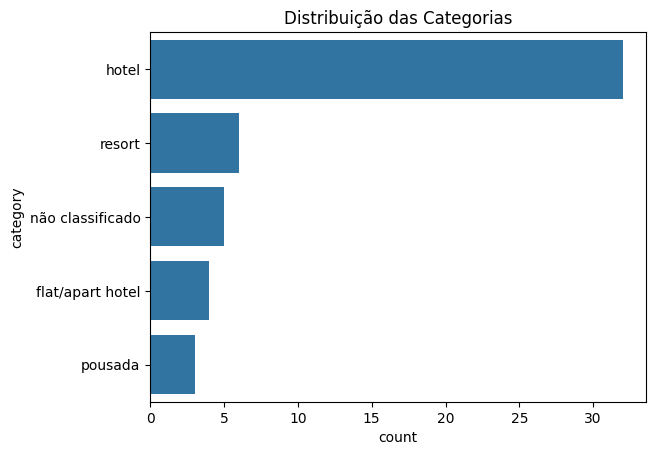

In [ ]:
df.info()

df.describe()

missing_values = df.isnull().sum()
print("Valores ausentes por coluna:\n", missing_values)

print("Categorias únicas na coluna 'category':", df['category'].unique())

sns.countplot(data=df, y='category', order=df['category'].value_counts().index)
plt.title("Distribuição das Categorias")
plt.show()


In [ ]:
def normalize_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def clean_missing_values(df, column, fill_value=""):
    if df[column].isnull().sum() > 0:
        print(f"Substituindo valores ausentes na coluna '{column}'...")
        df[column].fillna(fill_value, inplace=True)

def clean_data(df):
    print("Normalizando textos...")
    df['name'] = df['name'].apply(normalize_text)
    df['description'] = df['description'].apply(normalize_text)

    clean_missing_values(df, 'name', "desconhecido")
    clean_missing_values(df, 'description', "não informado")
    clean_missing_values(df, 'category', "não classificado")

    return df


In [ ]:
print("Iniciando a limpeza dos dados...")
df_cleaned = clean_data(df)


print("Dados limpos:")
df_cleaned.head()

missing_values_after = df_cleaned.isnull().sum()
print("Valores ausentes após a limpeza:\n", missing_values_after)


Iniciando a limpeza dos dados...
Normalizando textos...
Dados limpos:
Valores ausentes após a limpeza:
 name           0
category       0
description    0
dtype: int64


In [ ]:
cleaned_file_path = "data/cleaned_classification_data.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Dados limpos salvos em: {cleaned_file_path}")


Dados limpos salvos em: data/cleaned_classification_data.csv
